In [357]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [358]:
dataset = pd.read_csv("train.csv")
df = pd.DataFrame(dataset)
print(df.head())

   id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      14000        14000          14000.0   36 months   
1 NaN        NaN       2000         2000           2000.0   36 months   
2 NaN        NaN       5000         5000           4750.0   36 months   
3 NaN        NaN      20600        20600          20600.0   36 months   
4 NaN        NaN      10000        10000          10000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_last_payment_amount  \
0      7.35       434.53     A        A4  ...                          NaN   
1     16.29        70.61     D        D2  ...                          NaN   
2      7.39       155.28     A        A4  ...                          NaN   
3     11.99       684.12     B        B5  ...                          NaN   
4      7.39       310.56     A        A4  ...                          NaN   

  disbursement_method debt_settlement_flag  debt_settlement_flag_date  \
0                Ca

In [359]:
df.shape

(517788, 145)

----------------------------------------------------

In [360]:
df[df['dti'].isnull()][['dti', 'annual_inc']]

dti  annual_inc
6409    NaN         0.0
7569    NaN         0.0
15362   NaN         0.0
24367   NaN         0.0
26053   NaN         0.0
...     ...         ...
499841  NaN         0.0
504953  NaN         0.0
506709  NaN         0.0
509177  NaN         0.0
513219  NaN         0.0

[132 rows x 2 columns]

In [361]:
#dti null becase of annual income is 0.... it is goes to infinity
df['dti'] = df['dti'].fillna(df['dti'].max()+1000)

In [362]:
df['revol_util'] = df['revol_util'].fillna((df['revol_bal'] / df['total_rev_hi_lim'])*100)
df['revol_util'] = df['revol_util'].fillna(0)

In [363]:
df['collections_12_mths_ex_med'].value_counts()

collections_12_mths_ex_med
0.0     509438
1.0       7708
2.0        532
3.0         61
4.0         16
5.0          6
6.0          5
10.0         1
9.0          1
7.0          1
Name: count, dtype: int64

In [364]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [365]:
df['tot_coll_amt'].value_counts()

tot_coll_amt
0.0         415672
50.0          1018
100.0          829
75.0           579
200.0          469
             ...  
102752.0         1
4029.0           1
6303.0           1
2845.0           1
16622.0          1
Name: count, Length: 8479, dtype: int64

In [366]:
df['tot_coll_amt'] = df['tot_coll_amt'].fillna(0)

In [367]:
df['tot_cur_bal'].value_counts()

tot_cur_bal
0.0         153
25981.0      15
31799.0      14
23372.0      14
21181.0      14
           ... 
373218.0      1
659009.0      1
326162.0      1
353254.0      1
165260.0      1
Name: count, Length: 250661, dtype: int64

In [368]:
df['tot_cur_bal'] = df['tot_cur_bal'].fillna(round(df['tot_cur_bal'].mean()))

In [369]:
df['acc_open_past_24mths'].value_counts()

acc_open_past_24mths
3.0     72227
4.0     69848
2.0     63057
5.0     61114
6.0     48945
1.0     44003
7.0     36945
8.0     26583
0.0     19090
9.0     18414
10.0    12813
11.0     8775
12.0     5748
13.0     3777
14.0     2561
15.0     1752
16.0     1198
17.0      804
18.0      628
19.0      456
20.0      266
21.0      197
22.0      163
23.0      112
25.0       67
24.0       65
26.0       42
27.0       37
28.0       36
29.0       23
31.0       14
32.0        9
30.0        8
33.0        7
34.0        7
35.0        5
42.0        3
37.0        3
36.0        3
38.0        2
45.0        2
46.0        1
56.0        1
39.0        1
50.0        1
Name: count, dtype: int64

In [370]:
#since there do not exist 0, assume null value represent 0
df['acc_open_past_24mths'] = df['acc_open_past_24mths'].fillna(0)

In [371]:
df['bc_open_to_buy'].value_counts()

bc_open_to_buy
0.0        8634
2000.0      457
500.0       450
1000.0      401
3000.0      380
           ... 
51196.0       1
58946.0       1
44482.0       1
38185.0       1
82202.0       1
Name: count, Length: 54457, dtype: int64

In [372]:
# Assume they did not mention it some reason. then such situation represent by -1
df['bc_open_to_buy'] = df['bc_open_to_buy'].fillna(-1)

In [373]:
df['chargeoff_within_12_mths'].value_counts()

chargeoff_within_12_mths
0.0    513573
1.0      3821
2.0       289
3.0        49
4.0        23
5.0         9
6.0         3
8.0         1
7.0         1
Name: count, dtype: int64

In [374]:
# no harm to null fill by 0 becacse null value =19
df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

In [375]:
df['mo_sin_old_il_acct'].value_counts()

mo_sin_old_il_acct
127.0    5927
125.0    5912
122.0    5899
130.0    5869
128.0    5839
         ... 
665.0       1
450.0       1
509.0       1
822.0       1
640.0       1
Name: count, Length: 485, dtype: int64

In [376]:
# assum null value represent account never opend, reoresent -1
df['mo_sin_old_il_acct'] = df['mo_sin_old_il_acct'].fillna(-1)
#Similary
df['mo_sin_rcnt_rev_tl_op'] = df['mo_sin_rcnt_rev_tl_op'].fillna(-1)
df['mo_sin_rcnt_tl'] = df['mo_sin_rcnt_tl'].fillna(-1)

In [377]:
df['mort_acc'].value_counts()

mort_acc
0.0     205494
1.0      87310
2.0      71899
3.0      52465
4.0      36011
5.0      21713
6.0      12075
7.0       6342
8.0       3126
9.0       1554
10.0       767
11.0       422
12.0       238
13.0       133
14.0        95
15.0        50
16.0        30
17.0        20
18.0        15
19.0         9
20.0         8
21.0         7
22.0         6
24.0         6
23.0         4
27.0         3
25.0         3
26.0         2
28.0         2
29.0         2
32.0         1
34.0         1
Name: count, dtype: int64

In [378]:
#since this has significan number of missing value we cannot add one group beacse ot chnage the dta.so we create new thing for null vallue = -1
df['mort_acc'] = df['mort_acc'].fillna(-1)

In [379]:
df['mths_since_recent_bc'].value_counts()

mths_since_recent_bc
3.0      25299
2.0      25028
4.0      23828
5.0      22168
6.0      20961
         ...  
406.0        1
426.0        1
367.0        1
533.0        1
451.0        1
Name: count, Length: 422, dtype: int64

In [380]:
# assume null value indicate never get bank card
df['mths_since_recent_bc'] = df['mths_since_recent_bc'].fillna(-1)
#Similary
df['mths_since_recent_inq'] = df['mths_since_recent_inq'].fillna(-1)

In [381]:
df['num_accts_ever_120_pd'].value_counts()

num_accts_ever_120_pd
0.0     374893
1.0      62699
2.0      25198
3.0      11499
4.0       6687
5.0       3952
6.0       2482
7.0       1559
8.0        953
9.0        632
10.0       447
11.0       234
12.0       208
13.0       125
14.0        97
15.0        56
16.0        38
17.0        28
18.0        23
23.0        15
20.0        13
21.0        11
19.0        11
24.0        10
22.0         9
25.0         7
30.0         4
26.0         4
29.0         3
31.0         2
34.0         2
32.0         2
27.0         2
33.0         2
35.0         1
39.0         1
Name: count, dtype: int64

In [382]:
# Assume null value inducate 0
df['num_accts_ever_120_pd'] = df['num_accts_ever_120_pd'].fillna(0)

In [383]:
df['num_actv_bc_tl'].value_counts()

num_actv_bc_tl
3.0     105128
2.0      99423
4.0      81964
1.0      55841
5.0      54980
6.0      34203
7.0      20322
8.0      12030
0.0      10403
9.0       7061
10.0      4166
11.0      2514
12.0      1525
13.0       854
14.0       509
15.0       373
16.0       209
17.0       144
18.0        91
19.0        62
20.0        33
21.0        19
22.0        16
23.0        11
25.0         8
24.0         8
26.0         5
27.0         2
30.0         2
32.0         1
29.0         1
28.0         1
Name: count, dtype: int64

In [384]:
#create new value for null values = -1
df['num_actv_bc_tl'] = df['num_actv_bc_tl'].fillna(-1)
#Similary
df['num_bc_tl'] = df['num_bc_tl'].fillna(-1)
df['num_il_tl'] = df['num_il_tl'].fillna(-1)

In [385]:
df['num_tl_120dpd_2m'].value_counts()

num_tl_120dpd_2m
0.0    471715
1.0       366
2.0        13
3.0         3
6.0         1
Name: count, dtype: int64

In [386]:
df['num_tl_120dpd_2m'] = df['num_tl_120dpd_2m'].fillna(0)

In [387]:
df['num_tl_90g_dpd_24m'].value_counts()

num_tl_90g_dpd_24m
0.0     463329
1.0      21412
2.0       4270
3.0       1149
4.0        656
5.0        337
6.0        264
7.0        134
8.0        104
9.0         75
10.0        50
11.0        40
12.0        31
13.0        14
14.0        10
15.0         8
18.0         7
16.0         6
20.0         4
17.0         2
26.0         1
30.0         1
21.0         1
29.0         1
19.0         1
25.0         1
39.0         1
Name: count, dtype: int64

In [388]:
df['num_tl_90g_dpd_24m'] = df['num_tl_90g_dpd_24m'].fillna(0)

In [389]:
df['pct_tl_nvr_dlq'].value_counts()

pct_tl_nvr_dlq
100.0    242169
95.0       7286
90.0       6865
96.0       6442
91.7       4957
          ...  
37.3          1
37.8          1
14.8          1
64.2          1
17.6          1
Name: count, Length: 560, dtype: int64

In [390]:
df['pct_tl_nvr_dlq'] = df['pct_tl_nvr_dlq'].fillna(-1)

In [391]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0     451772
1.0      61683
2.0       3169
3.0        668
4.0        165
5.0         54
6.0         14
7.0          9
8.0          2
11.0         1
12.0         1
Name: count, dtype: int64

In [392]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [393]:
df['tax_liens'].value_counts()

tax_liens
0.0     500801
1.0      11654
2.0       3129
3.0       1116
4.0        484
5.0        272
6.0        129
7.0         74
8.0         41
10.0        19
9.0         16
11.0        12
12.0         6
15.0         4
13.0         3
16.0         2
18.0         2
14.0         2
17.0         2
24.0         1
21.0         1
22.0         1
39.0         1
19.0         1
45.0         1
34.0         1
23.0         1
20.0         1
Name: count, dtype: int64

In [394]:
df['tax_liens'] = df['tax_liens'].fillna(0)

In [395]:
df['total_bc_limit'].value_counts()

total_bc_limit
0.0         5489
5000.0      4100
6000.0      3700
7000.0      3435
4000.0      3390
            ... 
57753.0        1
7738.0         1
135201.0       1
28850.0        1
44924.0        1
Name: count, Length: 8639, dtype: int64

In [396]:
df['total_bc_limit'] = df['total_bc_limit'].fillna(-1)

In [397]:
df[df['total_bal_ex_mort'].isnull()][['total_bal_ex_mort','total_bal_il']]
df['total_bal_ex_mort'].value_counts()

total_bal_ex_mort
0.0         256
24294.0      22
24722.0      21
21839.0      20
11906.0      20
           ... 
221258.0      1
81699.0       1
107907.0      1
76833.0       1
80405.0       1
Name: count, Length: 132547, dtype: int64

In [398]:
#missing value count too high related to data...-1
df['total_bal_ex_mort'] = df['total_bal_ex_mort'].fillna(-1)

In [399]:
# two values mostly equal
df['total_bal_ex_mort']

0          23659.0
1           4168.0
2          20061.0
3          12355.0
4         141874.0
            ...   
517783     52170.0
517784    106932.0
517785     63601.0
517786     57460.0
517787     41038.0
Name: total_bal_ex_mort, Length: 517788, dtype: float64

-------------------------------------------------------------

In [400]:
df = df.drop_duplicates()
print(df.shape)

(517788, 145)


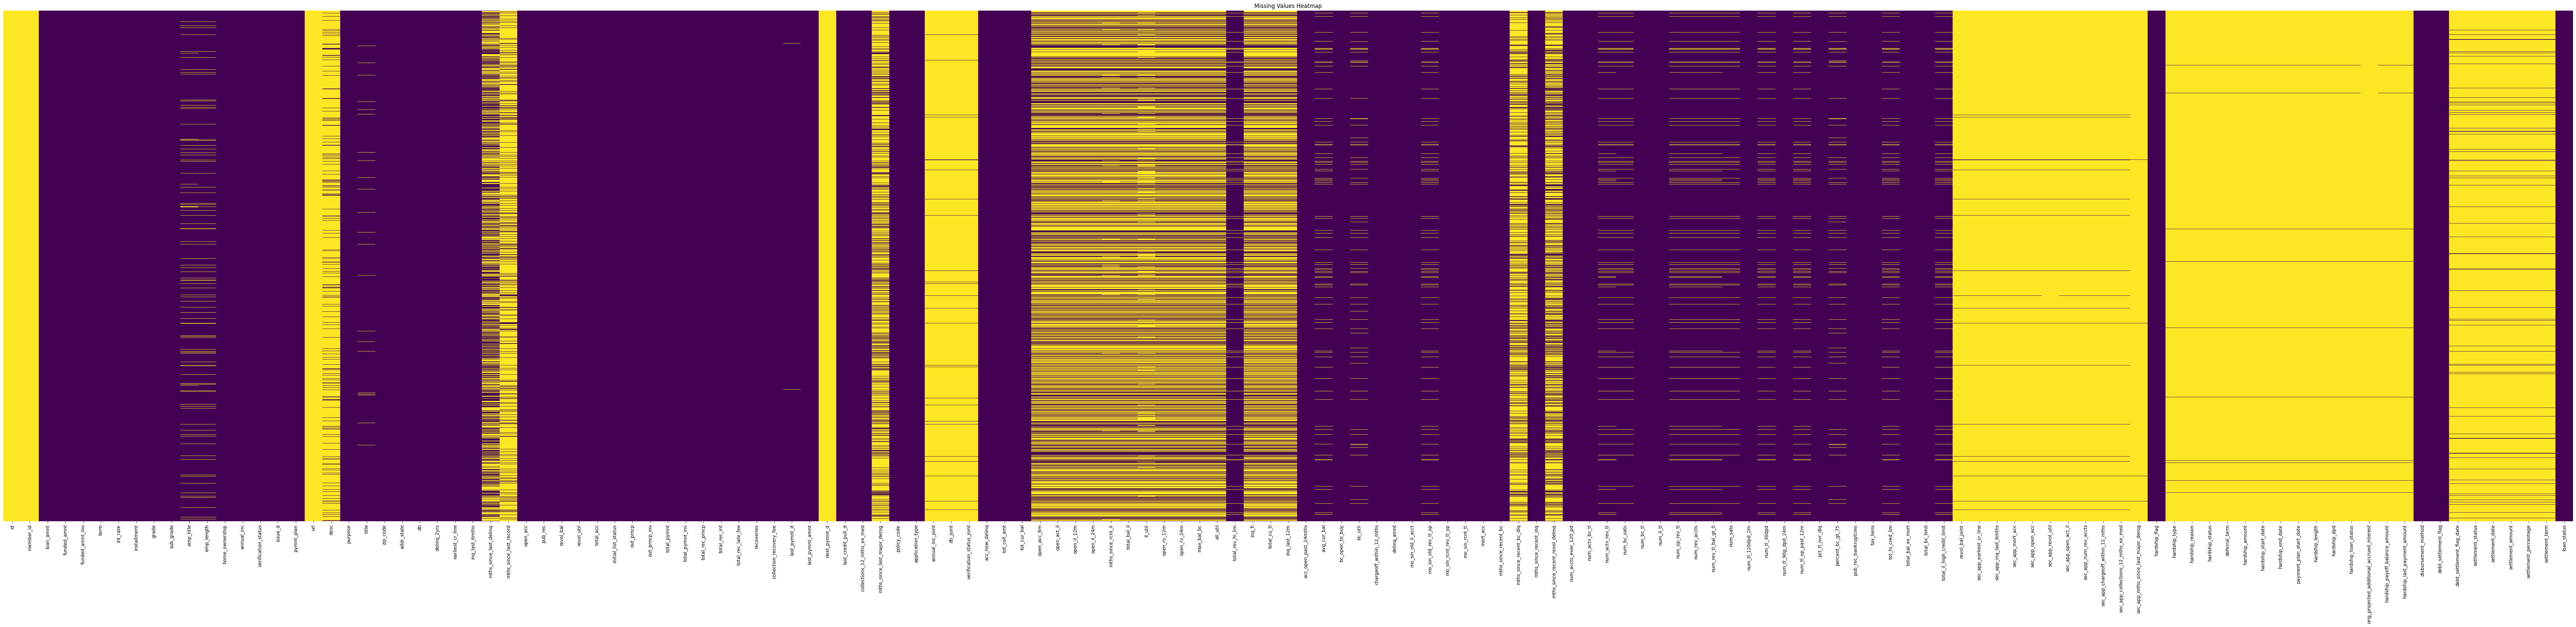

In [401]:
plt.figure(figsize=(100,20))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [402]:
threshold = 0.5
df = df.dropna(axis=1, thresh=len(df)*0.5)

In [403]:
df.shape

(517788, 87)

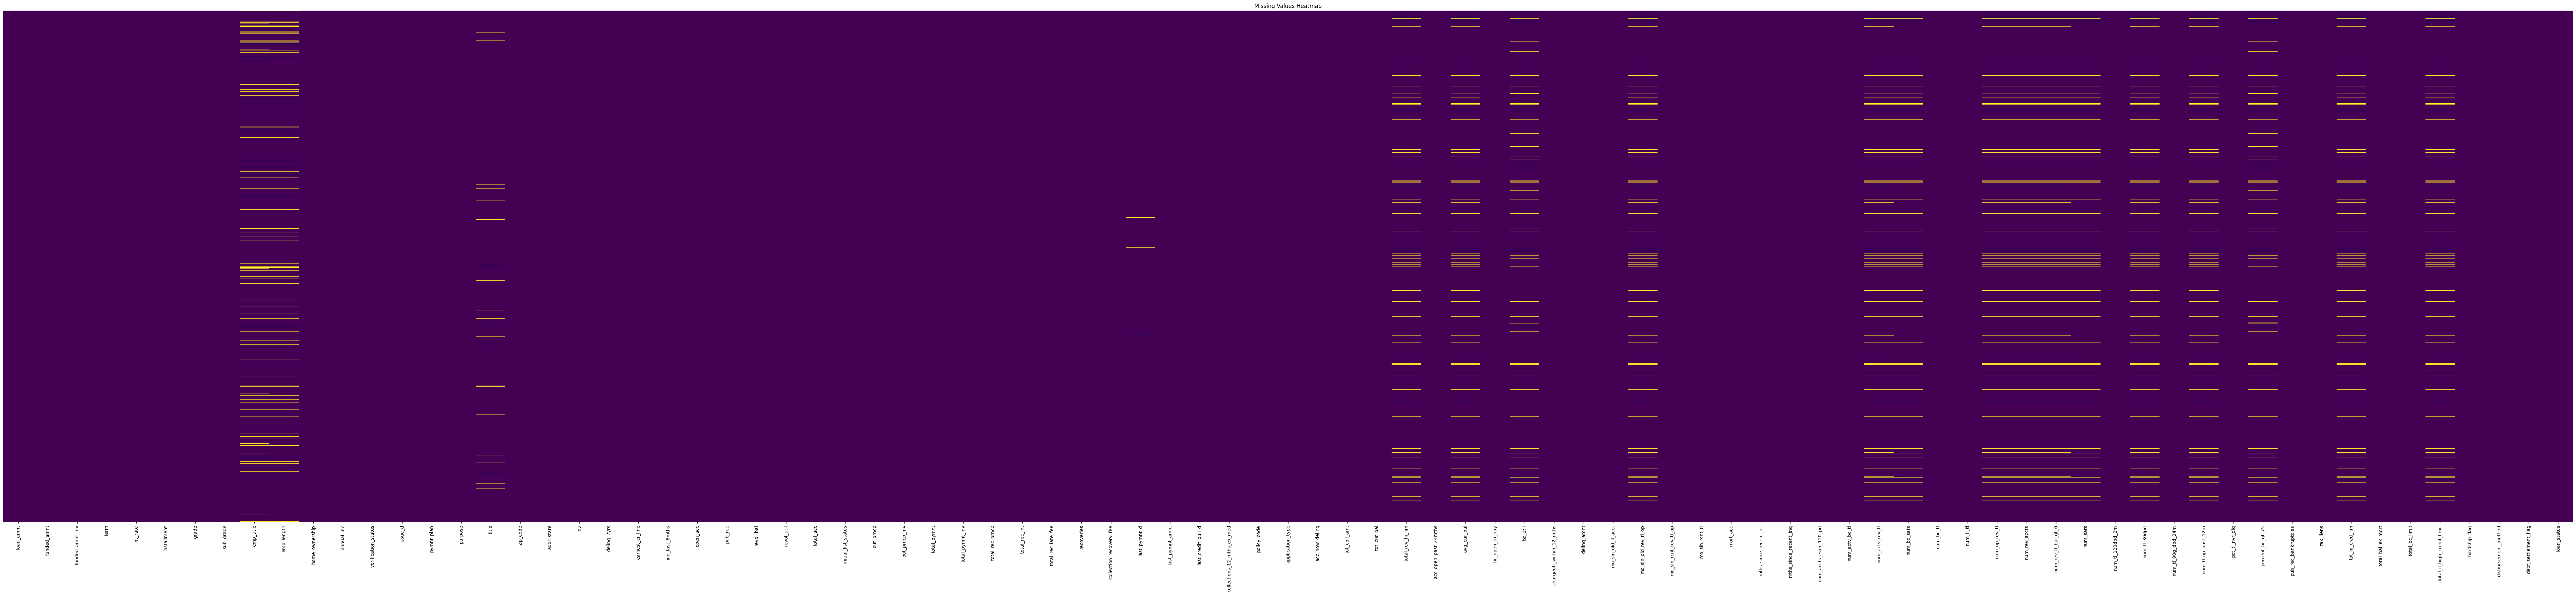

In [404]:
plt.figure(figsize=(100,20))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [405]:
df.select_dtypes(exclude=['number'])

term grade sub_grade                           emp_title  \
0        36 months     A        A4                          Paralegal    
1        36 months     D        D2                                 NaN   
2        36 months     A        A4                               owner   
3        36 months     B        B5                                 NaN   
4        36 months     A        A4                  Senior UX designer   
...            ...   ...       ...                                 ...   
517783   36 months     D        D5  Quillayute Valley School District    
517784   36 months     C        C3                        truck driver   
517785   60 months     D        D3          maitenance work controller   
517786   36 months     C        C5              Merlin Law Group, P.A.   
517787   36 months     A        A3                   Financial Advisor   

       emp_length home_ownership verification_status   issue_d pymnt_plan  \
0          1 year       MORTGAGE        Not Verified  Aug-2017          n   
1             NaN       MORTGAGE            Verified  Jul-2014          n   
2         4 years       MORTGAGE        Not Verified  Mar-2016          n   
3             NaN       MORTGAGE     Source Verified  Jan-2015          n   
4        < 1 year       MORTGAGE     Source Verified  Mar-2016          n   
...           ...            ...                 ...       ...        ...   
517783    3 years           RENT            Verified  Jul-2013          n   
517784    4 years       MORTGAGE     Source Verified  May-2017          n   
517785  10+ years       MORTGAGE     Source Verified  Feb-2014          n   
517786  10+ years       MORTGAGE            Verified  Feb-2013          n   
517787  10+ years       MORTGAGE     Source Verified  Oct-2014          n   

                   purpose  ... zip_code addr_state earliest_cr_line  \
0       debt_consolidation  ...    740xx         OK         Feb-2003   
1       debt_consolidation  ...    337xx         FL         Mar-1982   
2              credit_card  ...    786xx         TX         Jul-1997   
3       debt_consolidation  ...    780xx         TX         Apr-1998   
4              credit_card  ...    191xx         PA         Jan-2001   
...                    ...  ...      ...        ...              ...   
517783             medical  ...    985xx         WA         Nov-1995   
517784  debt_consolidation  ...    790xx         TX         Apr-2008   
517785  debt_consolidation  ...    788xx         TX         Nov-1990   
517786  debt_consolidation  ...    337xx         FL         Dec-1994   
517787  debt_consolidation  ...    473xx         IN         Mar-1997   

       initial_list_status last_pymnt_d last_credit_pull_d application_type  \
0                        f     Dec-2018           Dec-2018       Individual   
1                        w     Jul-2017           Jul-2017       Individual   
2                        f     Oct-2017           Oct-2017       Individual   
3                        f     Jan-2018           Dec-2017       Individual   
4                        w     Dec-2017           Jul-2018       Individual   
...                    ...          ...                ...              ...   
517783                   f     Apr-2014           Oct-2016       Individual   
517784                   f     Feb-2019           Feb-2019       Individual   
517785                   f     Aug-2014           Oct-2016       Individual   
517786                   f     Feb-2016           Jul-2018       Individual   
517787                   w     Aug-2017           Feb-2019       Individual   

       hardship_flag disbursement_method debt_settlement_flag  
0                  N                Cash                    N  
1                  N                Cash                    N  
2                  N                Cash                    N  
3                  N                Cash                    N  
4                  N                Cash                    N  
..

In [406]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [407]:
# One Hot Encoding for term
label_encoder = LabelEncoder()
df['term'] = label_encoder.fit_transform(df['term'])

In [408]:
# grade and subgrade correlated
df = df.drop(columns=['grade'])

In [409]:
values = df['sub_grade'].unique()
print(sorted(values))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


In [410]:
# ordinal encoding for sub-grade
mapping = {
    'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4,
    'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9,
    'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14,
    'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19,
    'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24,
    'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29,
    'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34
}
df['sub_grade'] = df['sub_grade'].replace(mapping)

C:\Users\USER\AppData\Local\Temp\ipykernel_13400\394894341.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sub_grade'] = df['sub_grade'].replace(mapping)


In [411]:
df['emp_title'].value_counts()

emp_title
Teacher                       7968
Manager                       7468
Owner                         4070
Registered Nurse              3329
Supervisor                    3205
                              ... 
Medical coding                   1
Chevron Pipeline Company         1
Server/Kitchen/Maintenance       1
Fransen and Molinaro, LLP        1
Merlin Law Group, P.A.           1
Name: count, Length: 175168, dtype: int64

In [412]:
df['emp_title'] = df['emp_title'].fillna(0)
df['emp_title'] = df['emp_title'].apply(lambda x: 1 if x != 0 else 0)

In [413]:
df['emp_title'].value_counts()

emp_title
1    483737
0     34051
Name: count, dtype: int64

In [414]:
df['emp_length'].unique()

array(['1 year', nan, '4 years', '< 1 year', '5 years', '10+ years',
       '2 years', '7 years', '9 years', '3 years', '8 years', '6 years'],
      dtype=object)

In [415]:
# ordinal encoding for emp_length
df['emp_length'] = df['emp_length'].fillna(0)
mapping = {'< 1 year':1, '1 year':2, '2 years':3, '3 years':4, '4 years':5, '5 years':6, '6 years':7, '7 years':8, '8 years':9, '9 years':10, '10+ years':11}
df['emp_length'] = df['emp_length'].replace(mapping)

C:\Users\USER\AppData\Local\Temp\ipykernel_13400\1299898693.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace(mapping)


In [416]:
df['emp_length'].value_counts()

emp_length
11    169173
3      46993
1      41689
4      41332
2      33849
6      32308
0      31300
5      31137
7      24144
9      23348
8      22838
10     19677
Name: count, dtype: int64

In [417]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    252366
RENT        209867
OWN          55379
ANY            104
OTHER           56
NONE            16
Name: count, dtype: int64

In [418]:
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])

In [419]:
df['verification_status'].value_counts()

verification_status
Source Verified    201289
Verified           166020
Not Verified       150479
Name: count, dtype: int64

In [420]:
#ordinal encoding for verification_status
mapping = {
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
}
df['verification_status'] = df['verification_status'].replace(mapping)

C:\Users\USER\AppData\Local\Temp\ipykernel_13400\4248215543.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['verification_status'] = df['verification_status'].replace(mapping)


In [421]:
df['issue_d'].value_counts()

issue_d
Oct-2015    17053
Mar-2016    16842
Jul-2015    16222
Dec-2015    15408
Oct-2014    14182
            ...  
Aug-2007       12
Sep-2008       12
Nov-2007       10
Jul-2007        9
Sep-2007        6
Name: count, Length: 138, dtype: int64

In [422]:
df['issue_y'] = df['issue_d'].str.extract('(\d{4})')
df['issue_y'] = df['issue_y'].astype(int)
df = df.drop(columns=['issue_d'])

In [423]:
df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [424]:
df = df.drop(columns=['pymnt_plan'])

In [425]:
df['purpose'].value_counts()

purpose
debt_consolidation    303232
credit_card           110916
home_improvement       33200
other                  30044
major_purchase         11263
small_business          6421
medical                 6065
car                     5362
moving                  3754
vacation                3367
house                   2812
wedding                  854
renewable_energy         382
educational              116
Name: count, dtype: int64

In [426]:
#label encoding for purpose
df['purpose'] = label_encoder.fit_transform(df['purpose'])

In [427]:
df['title'].isnull().value_counts()

title
False    511171
True       6617
Name: count, dtype: int64

In [428]:
df['title'] = df['title'].fillna(0)
df['title'] = df['title'].apply(lambda x: 1 if x != 0 else 0)

In [429]:
df['zip_code'].value_counts()

zip_code
945xx    5855
750xx    5539
112xx    5414
606xx    4671
300xx    4535
         ... 
663xx       1
849xx       1
353xx       1
568xx       1
343xx       1
Name: count, Length: 909, dtype: int64

In [430]:
df['zip_code'] = df['zip_code'].str.replace('xx','')
df['zip_code'] = df['zip_code'].fillna(0)
df['zip_code'] = df['zip_code'].astype(int)

In [431]:
df['addr_state'].value_counts()

addr_state
CA    75459
NY    42810
TX    42674
FL    37063
IL    19570
NJ    18794
PA    17716
OH    16874
GA    16429
VA    14736
NC    14450
MI    13578
AZ    12529
MD    12131
MA    11867
CO    11097
WA    10992
MN     9174
IN     8547
MO     8279
NV     7866
TN     7831
CT     7489
WI     6828
AL     6601
LA     6113
OR     6061
SC     6047
KY     4979
OK     4811
KS     4279
AR     3888
UT     3808
NM     2795
HI     2640
MS     2562
NH     2369
RI     2244
WV     1851
DE     1477
MT     1436
NE     1371
DC     1291
AK     1237
WY     1116
SD     1113
VT      963
ME      727
ID      619
ND      605
IA        2
Name: count, dtype: int64

In [432]:
df['addr_state'] = label_encoder.fit_transform(df['addr_state'])

In [433]:
df['earliest_cr_line'].value_counts()

earliest_cr_line
Aug-2001    3680
Aug-2002    3545
Sep-2003    3480
Oct-2001    3461
Aug-2000    3416
            ... 
Feb-1962       1
Aug-1960       1
Dec-1961       1
Jan-1953       1
Jul-1960       1
Name: count, Length: 709, dtype: int64

In [434]:
import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
# df['application_type'] = pd.to_datetime(df['application_type'], format='%b-%Y')

current_date = datetime.datetime.now()
df['earliest_cr_line'] = (((current_date - df['earliest_cr_line']).dt.days)/30)
df['earliest_cr_line'] = df['earliest_cr_line'].astype(int)


In [435]:
print(df['last_pymnt_d'].isnull().value_counts())
print(df['last_pymnt_d'].value_counts())

last_pymnt_d
False    516428
True       1360
Name: count, dtype: int64
last_pymnt_d
Aug-2018    15503
Mar-2018    14941
Jul-2018    14231
Jun-2018    13842
May-2018    13204
            ...  
Sep-2008        3
Apr-2008        3
Mar-2008        3
Nov-2008        3
Jan-2008        2
Name: count, Length: 133, dtype: int64


In [436]:
df[df['last_pymnt_d'].notnull()]['last_pymnt_d'].sort_values()

99164     Apr-2008
504946    Apr-2008
302092    Apr-2008
473391    Apr-2009
298954    Apr-2009
            ...   
212845    Sep-2018
35035     Sep-2018
114504    Sep-2018
260196    Sep-2018
273319    Sep-2018
Name: last_pymnt_d, Length: 516428, dtype: object

In [437]:
df['last_pymnt_d'] = df['last_pymnt_d'].fillna('Jan-1960')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%Y')

current_date = datetime.datetime.now()
df['last_pymnt_d'] = (((current_date - df['last_pymnt_d']).dt.days)/30)
df['last_pymnt_d'] = df['last_pymnt_d'].astype(int)

In [438]:
print(df['last_credit_pull_d'].isnull().value_counts())
print(df['last_credit_pull_d'].value_counts())

last_credit_pull_d
False    517768
True         20
Name: count, dtype: int64
last_credit_pull_d
Feb-2019    175047
Jan-2019     27651
Oct-2016     27506
Jul-2018     23360
Oct-2018     19744
             ...  
Oct-2007         1
Dec-2008         1
Jul-2008         1
Jan-2008         1
Sep-2008         1
Name: count, Length: 132, dtype: int64


In [439]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna('Jan-1960')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%Y')

current_date = datetime.datetime.now()
df['last_credit_pull_d'] = (((current_date - df['last_credit_pull_d']).dt.days)/30)
df['last_credit_pull_d'] = df['last_credit_pull_d'].astype(int)

In [440]:
df['initial_list_status'].value_counts()

initial_list_status
w    298836
f    218952
Name: count, dtype: int64

In [441]:
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [442]:
df['application_type'].value_counts()

application_type
Individual    508323
Joint App       9465
Name: count, dtype: int64

In [443]:
df['application_type'] = label_encoder.fit_transform(df['application_type'])

In [444]:
df['hardship_flag'].value_counts()

hardship_flag
N    517788
Name: count, dtype: int64

In [445]:
df = df.drop(columns=['hardship_flag'])

In [446]:
df['disbursement_method'].value_counts()

disbursement_method
Cash         515477
DirectPay      2311
Name: count, dtype: int64

In [447]:
df['disbursement_method'] = label_encoder.fit_transform(df['disbursement_method'])

In [448]:
df['debt_settlement_flag'].value_counts()

debt_settlement_flag
N    498528
Y     19260
Name: count, dtype: int64

In [449]:
df['debt_settlement_flag'] = label_encoder.fit_transform(df['debt_settlement_flag'])

In [450]:
print(df['policy_code'].value_counts())
print(df['out_prncp'].value_counts())
print(df['out_prncp_inv'].value_counts())

policy_code
1    517788
Name: count, dtype: int64
out_prncp
0.0    517788
Name: count, dtype: int64
out_prncp_inv
0.0    517788
Name: count, dtype: int64


In [451]:
df = df.drop(columns=['policy_code', 'out_prncp', 'out_prncp_inv'])

In [452]:
correlation_matrix = df.corr()
plt.figure(figsize=(100,100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [453]:
df['loan_status'].value_counts()

loan_status
1    360795
0    156993
Name: count, dtype: int64

# Remove correlated features

In [454]:
# Remove highly correlated features
threshold = 0.75
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

df = df.drop(columns=highly_correlated_features)

In [455]:
correlation_matrix = df.corr()
plt.figure(figsize=(100,100))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [456]:
df.shape

(517788, 57)

In [468]:
columns_with_null_values = df.columns[df.isna().any()].tolist()
print(columns_with_null_values)

[]


In [458]:
columns_with_null_values = df.columns[df.isnull().any()].tolist()
print(columns_with_null_values)

[]


In [459]:

count = 0
for name in columns_with_null_values:
    length = len(df[df[name].isnull()][name])
    count += length
    print(name, length)
print('Total missing value count', count)

Total missing value count 0


In [482]:
y_train = df['loan_status']
X_train = df.drop(columns=['loan_status'])

xgb_model = XGBClassifier()

from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector

efs = ExhaustiveFeatureSelector(xgb_model, min_features=55, max_features=56, scoring='accuracy', print_progress=True, cv=None, n_jobs=-1).fit(X_train, y_train)
selected_feature_indices = efs.best_idx_
selected_feature_names = df.feature_names[selected_feature_indices]
print(selected_feature_names)


ValueError: Classification metrics can't handle a mix of unknown and binary targets